<div align="center">
Devoir #3<br>

## Guy Junior CALVET
## Entraînement d’un Perceptron MultiCouches (PMC) et d’un Réseau de Neurones Profond de type CNN<br>
## PARTIE 2
<div align="center">
Dans le cadre du cours 8IAR403 – apprentissage automatique pour la science des données<br><br>
Le 21 avril 2025<br><br>
</div></div>

***

1. But  
● Étudier un réseau de neurones de type Perceptron MultiCouches sur le cas de vente en 
ligne; 
● Étudier un réseau de neurones profond de type convolution (CNN) pour classer des images; 
● Augmentation de données pour « lutter » contre le sur-apprentissage; 
● Transfert d’apprentissage pour réutiliser un modèle pré-entraîné et gagner en performance; 
● Utilisation des bibliothèques standard comme Scikit-Learn, Keras et TensorFlow. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
import time
import random
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

#### 2.2.1..

#### Télécharger du site de cours, section du devoir#3, le code source d’un perceptron multi couches (PMC) pour le même dataset « Fashion_MNIST » e  est implémenté avec Keras.Re-exécuter le code pour prendre connaissance du code et vo r sa courbe de performance.

In [4]:
#importation du module keras
from tensorflow import keras

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

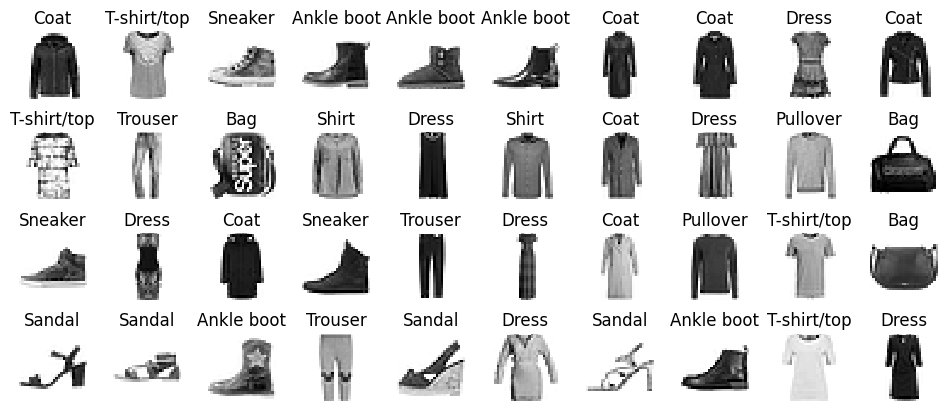

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [8]:
keras.backend.clear_session() # re-initialiser les états internes de tensorflow
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [12]:
start = time.time()
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))
pmc_time = time.time() - start

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7219 - accuracy: 0.7627 - val_loss: 0.5169 - val_accuracy: 0.8272
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4853 - accuracy: 0.8301 - val_loss: 0.4295 - val_accuracy: 0.8552
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4386 - accuracy: 0.8449 - val_loss: 0.5287 - val_accuracy: 0.7966
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4119 - accuracy: 0.8565 - val_loss: 0.3930 - val_accuracy: 0.8666
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3938 - accuracy: 0.8619 - val_loss: 0.3740 - val_accuracy: 0.8704
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3754 - accuracy: 0.8673 - val_loss: 0.3689 - val_accuracy: 0.8752
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3634 - accuracy: 0.8715 - val_loss: 0.3618 - val_accuracy:

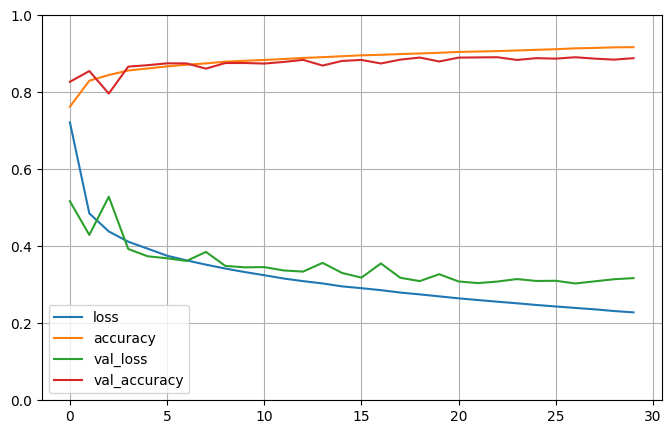

In [13]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3384 - accuracy: 0.8817


[0.33835411071777344, 0.8816999793052673]

#### 2.2.2.

#### Implanter un CNN dont l’architecture reste à déterminer par vous et qui doit améliorer la performance du modèle obtenu en 2.2.1. Pour l’utilisation du GPU, veuillez consulter l’annexe de la page 4. 

In [15]:
# Seed pour résultats reproductibles
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

In [16]:
#chargement des données
(x_train_cnn, y_train_cnn), (x_test_cnn, y_test_cnn) = fashion_mnist.load_data()
x_train_cnn = x_train_cnn.reshape((-1, 28, 28, 1)).astype('float32') / 255
x_test_cnn = x_test_cnn.reshape((-1, 28, 28, 1)).astype('float32') / 255
y_train_cat = to_categorical(y_train_cnn)
y_test_cat = to_categorical(y_test_cnn)

In [17]:
# Découpe d'un jeu de validation
x_val = x_train_cnn[:5000]
y_val = y_train_cat[:5000]
x_train_final = x_train_cnn[5000:]
y_train_final = y_train_cat[5000:]

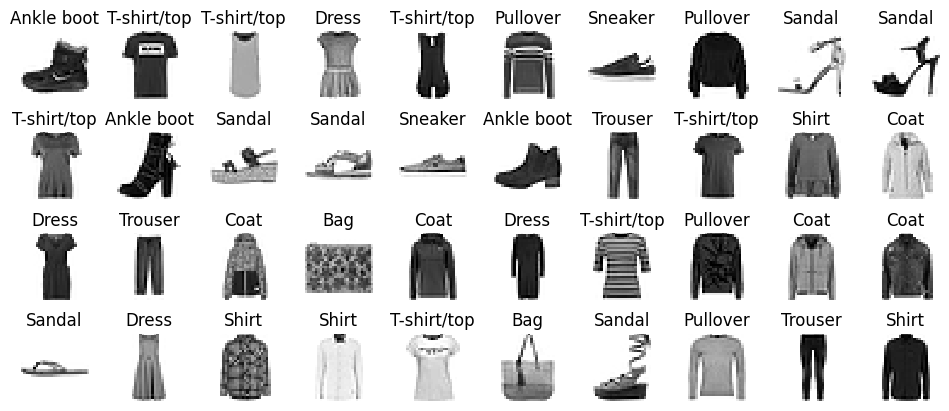

In [18]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train_cnn[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train_cnn[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [19]:
#cnn_model = models.Sequential([
#    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#    layers.MaxPooling2D((2, 2)),
#    layers.Conv2D(64, (3, 3), activation='relu'),
#    layers.MaxPooling2D((2, 2)),
#    layers.Flatten(),
#    layers.Dense(64, activation='relu'),
#    layers.Dense(10, activation='softmax')
#])

In [20]:
# Modèle CNN robuste
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.6),
    layers.Dense(10, activation='softmax')
])

In [21]:
optimizer = Adam(learning_rate=0.0003)
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

start = time.time()
cnn_history = cnn_model.fit(x_train_final, y_train_final, epochs=20, batch_size=64, validation_data=(x_val, y_val), verbose=1)
cnn_time = time.time() - start

Epoch 1/20
860/860 [==============================] - 115s 132ms/step - loss: 0.6547 - accuracy: 0.7762 - val_loss: 0.3232 - val_accuracy: 0.8866
Epoch 2/20
860/860 [==============================] - 115s 133ms/step - loss: 0.3945 - accuracy: 0.8611 - val_loss: 0.2741 - val_accuracy: 0.8980
Epoch 3/20
860/860 [==============================] - 118s 137ms/step - loss: 0.3413 - accuracy: 0.8793 - val_loss: 0.2869 - val_accuracy: 0.8888
Epoch 4/20
860/860 [==============================] - 114s 133ms/step - loss: 0.3091 - accuracy: 0.8915 - val_loss: 0.2331 - val_accuracy: 0.9166
Epoch 5/20
860/860 [==============================] - 115s 133ms/step - loss: 0.2861 - accuracy: 0.8994 - val_loss: 0.2431 - val_accuracy: 0.9126
Epoch 6/20
860/860 [==============================] - 115s 133ms/step - loss: 0.2719 - accuracy: 0.9039 - val_loss: 0.2244 - val_accuracy: 0.9180
Epoch 7/20
860/860 [==============================] - 133s 154ms/step - loss: 0.2562 - accuracy: 0.9082 - val_loss: 0.2130 -

In [22]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)       

In [35]:
cnn_model_evaluate = cnn_model.evaluate(x_test_cnn, y_test_cat)
cnn_model_evaluate

313/313 [==============================] - 5s 16ms/step - loss: 0.2047 - accuracy: 0.9269


[0.20465782284736633, 0.9269000291824341]

cnn_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

cnn_history = cnn_model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

#### 2.2.3. Tracer la courbe d'apprentissage du CNN obtenu en 2.2.2 et analyser son comportement en s’appuyant sur la courbe de performance.

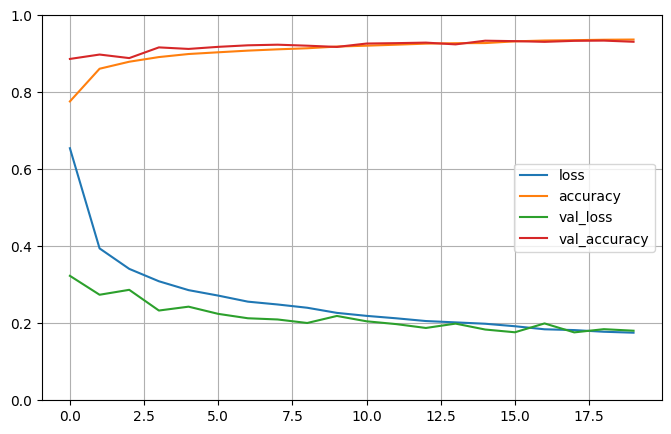

In [25]:
pd.DataFrame(cnn_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#### 2.2.4.

#### Entrainer le CNN obtenu en 2.2.2 en utilisant la technique d’augmentation des données à l’aide de l’outil « ImageDataGenerator » de Keras  (https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/Image DataGenerator).  Tracer sa courbe de performance. Que constatez-vous

In [26]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train_cnn)

cnn_aug_model = tf.keras.models.clone_model(cnn_model)
cnn_aug_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
cnn_aug_history = cnn_aug_model.fit(datagen.flow(x_train_cnn, y_train_cat, batch_size=128),
                                    epochs=20, validation_data=(x_test_cnn, y_test_cat), verbose=1)
cnn_aug_time = time.time() - start

Epoch 1/20
469/469 [==============================] - 175s 369ms/step - loss: 0.8694 - accuracy: 0.6938 - val_loss: 0.7401 - val_accuracy: 0.7033
Epoch 2/20
469/469 [==============================] - 155s 331ms/step - loss: 0.5691 - accuracy: 0.7892 - val_loss: 0.4244 - val_accuracy: 0.8453
Epoch 3/20
469/469 [==============================] - 162s 346ms/step - loss: 0.4968 - accuracy: 0.8179 - val_loss: 0.3845 - val_accuracy: 0.8544
Epoch 4/20
469/469 [==============================] - 158s 336ms/step - loss: 0.4509 - accuracy: 0.8353 - val_loss: 0.3304 - val_accuracy: 0.8774
Epoch 5/20
469/469 [==============================] - 155s 330ms/step - loss: 0.4245 - accuracy: 0.8452 - val_loss: 0.3486 - val_accuracy: 0.8737
Epoch 6/20
469/469 [==============================] - 154s 328ms/step - loss: 0.4071 - accuracy: 0.8524 - val_loss: 0.3575 - val_accuracy: 0.8714
Epoch 7/20
469/469 [==============================] - 157s 335ms/step - loss: 0.3874 - accuracy: 0.8592 - val_loss: 0.3260 -

In [26]:
cnn_aug_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_4 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 64)       

In [27]:
cnn_aug_model.evaluate(x_test_cnn, y_test_cat)

313/313 [==============================] - 6s 18ms/step - loss: 0.2392 - accuracy: 0.9137


[0.2392328679561615, 0.9136999845504761]

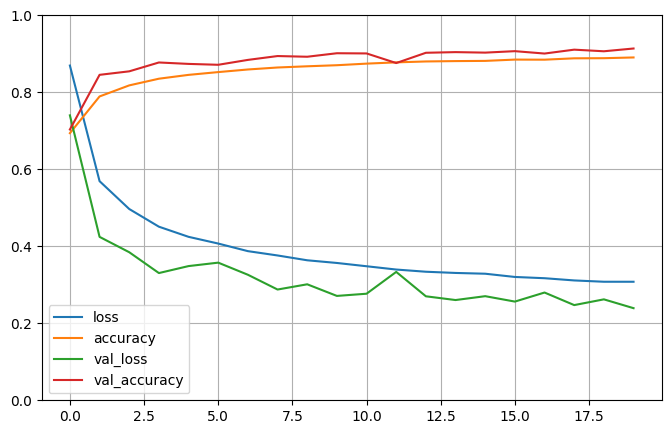

In [28]:
pd.DataFrame(cnn_aug_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Plutot decevant le resultat avec l'augmentation de la qualité des données.

#### 2.2.5. ? 

#### Utiliser un modèle pré-entrainé (VGG16 ou un autre) pour tenter d’augmenter la performance du CNN obtenu en 2.2.4. Tracer sa courbe de performance. Que constatezvous ?

In [29]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
x_train_vgg = tf.image.resize(tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_train_cnn)), [48, 48])
x_test_vgg = tf.image.resize(tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_test_cnn)), [48, 48])

#x_train_vgg = x_train_vgg[:10000]
#y_train_cat = y_train_cat[:10000]

In [30]:
y_train_cat = to_categorical(y_train_cnn)  # Refaire le one-hot encoding complet

print(x_train_vgg.shape, y_train_cat.shape)

(60000, 48, 48, 3) (60000, 10)


In [31]:
vgg_model = models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])
vgg_base.trainable = False

vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
start = time.time()
vgg_history = vgg_model.fit(x_train_vgg, y_train_cat, epochs=15, batch_size=128, validation_data=(x_test_vgg, y_test_cat), verbose=1)
vgg_time = time.time() - start

Epoch 1/15
469/469 [==============================] - 905s 2s/step - loss: 0.4623 - accuracy: 0.8373 - val_loss: 0.4375 - val_accuracy: 0.8424
Epoch 2/15
469/469 [==============================] - 911s 2s/step - loss: 0.3575 - accuracy: 0.8717 - val_loss: 0.3935 - val_accuracy: 0.8608
Epoch 3/15
469/469 [==============================] - 892s 2s/step - loss: 0.3314 - accuracy: 0.8784 - val_loss: 0.3903 - val_accuracy: 0.8569
Epoch 4/15
469/469 [==============================] - 858s 2s/step - loss: 0.3162 - accuracy: 0.8846 - val_loss: 0.3667 - val_accuracy: 0.8689
Epoch 5/15
469/469 [==============================] - 873s 2s/step - loss: 0.3031 - accuracy: 0.8888 - val_loss: 0.3711 - val_accuracy: 0.8666
Epoch 6/15
469/469 [==============================] - 1563s 3s/step - loss: 0.2877 - accuracy: 0.8931 - val_loss: 0.3526 - val_accuracy: 0.8739
Epoch 7/15
469/469 [==============================] - 899s 2s/step - loss: 0.2801 - accuracy: 0.8969 - val_loss: 0.3770 - val_accuracy: 0.866

In [32]:
vgg_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,849,610
Trainable params: 134,410
Non-trainable params: 14,715,200
____________________________________

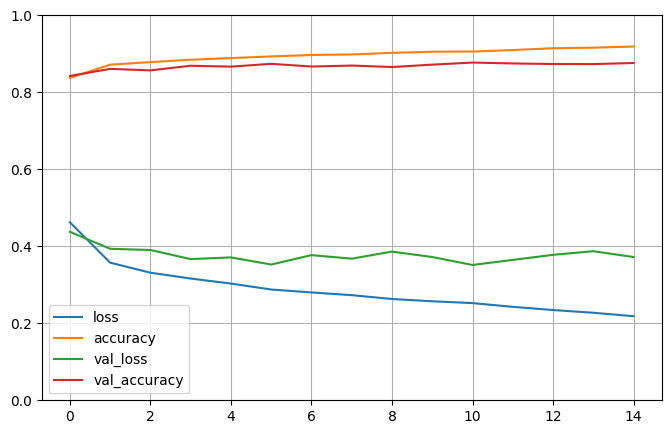

In [33]:
pd.DataFrame(vgg_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#### 2.2.6 -

#### Faîtes une étude comparative des 4 modèles (Modèle pré-entrainé avec VGG16 ou autre, CNN avec augmentation des données, CNN sans augmentation des données, PMC-Keras, en s’appuyant sur les critères suivants : l’exactitude (accuracy) et le temps d’entraînement moyennant le GPU.  

In [37]:
print("\nComparaison des modèles:")
print(f"PMC: {history.history['val_accuracy'][-1]*100:.2f}% - Temps: {pmc_time:.2f} sec")
print(f"CNN: {cnn_history.history['val_accuracy'][-1]*100:.2f}% - Temps: {cnn_time:.2f} sec")
print(f"CNN + Augmentation: {cnn_aug_history.history['val_accuracy'][-1]*100:.2f}% - Temps: {cnn_aug_time:.2f} sec")
print(f"VGG16: {vgg_history.history['val_accuracy'][-1]*100:.2f}% - Temps: {vgg_time:.2f} sec")


Comparaison des modèles:
PMC: 88.86% - Temps: 161.22 sec
CNN: 93.12% - Temps: 2630.80 sec
CNN + Augmentation: 91.37% - Temps: 2994.18 sec
VGG16: 87.61% - Temps: 14458.45 sec


En se basant sur l'accuracy des données de test et le temps d'execution comme paramètres pour chaque modèle, on peut voir que le modèle CNN de la section 2.2.2 est plus performant avec un accuracy 93.12% et avec un temps d'execution plus faible que le CNN_augmenté et le VGG16.

Bien qu'il ait un accuracy plus élevé que les autres modèles, il faut noter qu'il est celui qui a eu un surapprentissage le plus prononcé des quatres.

Le #2 semble être le CNN avec augmentation de la qualité des données de la section 2.2.4 avec un accuracy proche du CNN.

Le CNN initial est vraiment le plus performant !!